<font size="4"> <b> • DOMAIN: </b>Sports management</font>

<font size="4"> <b> • CONTEXT: </b>Company X is a sports management company for international cricket.

<font size="4"> <b> • DATA DESCRIPTION: </b>The data is collected belongs to batsman from IPL series conducted so far.    
    
• Attribute Information:
    
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far

<font size="4"> <b> • PROJECT OBJECTIVE: </b>Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

<b>Steps and tasks: [ Total Score: 5 points]</b>
    
1. EDA and visualisation:
    
>Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
      
2. Model
    
> Build a data driven model to rank all the players in the dataset using all or the most important performance features.
</font>
 

### Import dataset

In [337]:
SportsDB = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv') # Import the dataset
SportsDB

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing null values from the dataset

In [338]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(SportsDB)

,Total,Percent
Name,90,0.5
Runs,90,0.5
Ave,90,0.5
SR,90,0.5
Fours,90,0.5
Sixes,90,0.5
HF,90,0.5


In [339]:
SportsDB.dropna(axis=0,inplace=True)
SportsDB

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


### Correcting Duplicate Index

In [340]:
SportsDB.reset_index(inplace = True)
SportsDB.drop('index',axis =1, inplace=True)

In [341]:
SportsDB

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
85,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
86,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
87,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
88,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


### Checking for Duplicates

In [342]:
# Identify duplicates records in the data
dupe6 = SportsDB.duplicated()
sum(dupe6)

0

### Normalization / Scaling of dataset

In [343]:
std_scale = StandardScaler()
std_scale

StandardScaler()

In [344]:
SportsDB_normalized = SportsDB.copy()
SportsDB_normalized['Runs'] = std_scale.fit_transform(SportsDB_normalized[['Runs']]) 
SportsDB_normalized['Ave'] = std_scale.fit_transform(SportsDB_normalized[['Ave']]) 
SportsDB_normalized['SR'] = std_scale.fit_transform(SportsDB_normalized[['SR']]) 
SportsDB_normalized['Fours'] = std_scale.fit_transform(SportsDB_normalized[['Fours']]) 
SportsDB_normalized['Sixes'] = std_scale.fit_transform(SportsDB_normalized[['Sixes']]) 
SportsDB_normalized['HF'] = std_scale.fit_transform(SportsDB_normalized[['HF']]) 
SportsDB_normalized

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,CH Gayle,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
1,G Gambhir,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
2,V Sehwag,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
3,CL White,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
4,S Dhawan,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533
...,...,...,...,...,...,...,...
85,Z Khan,-1.338197,-1.382959,-2.065234,-1.152093,-0.952365,-0.707989
86,WD Parnell,-1.293147,-1.475256,-2.074160,-1.090775,-0.952365,-0.707989
87,PC Valthaty,-1.222355,-1.456796,-2.565132,-0.968140,-0.952365,-0.707989
88,RP Singh,-1.376812,-1.604470,-2.940057,-1.213411,-0.952365,-0.707989


### Numerical Dataset for EDA

In [345]:
SportsDB_numerical = SportsDB.drop('Name',axis =1)
SportsDB_numerical

,Runs,Ave,SR,Fours,Sixes,HF
0,733.0,61.08,160.74,46.0,59.0,9.0
1,590.0,36.87,143.55,64.0,17.0,6.0
2,495.0,33.00,161.23,57.0,19.0,5.0
3,479.0,43.54,149.68,41.0,20.0,5.0
4,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...
85,12.0,6.00,70.58,1.0,0.0,0.0
86,19.0,4.75,70.37,2.0,0.0,0.0
87,30.0,5.00,58.82,4.0,0.0,0.0
88,6.0,3.00,50.00,0.0,0.0,0.0


In [346]:
SportsDB_normalized_numerical = SportsDB_normalized.drop('Name',axis = 1)
SportsDB_normalized_numerical

,Runs,Ave,SR,Fours,Sixes,HF
0,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
1,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
2,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
3,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
4,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533
...,...,...,...,...,...,...
85,-1.338197,-1.382959,-2.065234,-1.152093,-0.952365,-0.707989
86,-1.293147,-1.475256,-2.074160,-1.090775,-0.952365,-0.707989
87,-1.222355,-1.456796,-2.565132,-0.968140,-0.952365,-0.707989
88,-1.376812,-1.604470,-2.940057,-1.213411,-0.952365,-0.707989


### Categorical Dataset for EDA

In [347]:
SportsDB1 = SportsDB.copy()

In [348]:
SportsDB1['Name'] = SportsDB1['Name'].astype('category')
SportsDB1.dtypes

Name     category
Runs      float64
Ave       float64
SR        float64
Fours     float64
Sixes     float64
HF        float64
dtype: object

In [349]:
SportsDB1['Country'] = SportsDB1['Name']


SportsDB1['Country'] = SportsDB1['Country'].str.replace('CH Gayle', 'West Indies')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('G Gambhir', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('V Sehwag', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('CL White', 'Australia')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('S Dhawan', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('AM Rahane', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('KP Pietersen', 'South Africa')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('RG Sharma', 'India')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('AB de Villiers', 'South Africa')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('JP Duminy', 'South Africa')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('DA Warner', 'Australia')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('SR Watson', 'Australia')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('F du Plessis','South Africa')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('OA Shah', 'Pakistan')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('DJ Bravo', 'West Indies')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('DJ Hussey', 'Australia')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('SK Raina', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('AT Rayudu', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('Mandeep Singh', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('R Dravid', 'India')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('DR Smith', 'West Indies')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('M Vijay', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('SPD Smith', 'Australia')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('TM Dilshan', 'Sri Lanka')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('RV Uthappa', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('SE Marsh', 'Australia')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('KA Pollard', 'West Indies')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('DMD Jayawardene', 'Sri Lanka')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('V Kohli', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('MA Agarwal', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('SR Tendulkar', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('MEK Hussey', 'Australia')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('JH Kallis', 'South Africa')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('MS Dhoni', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('MS Bisla', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('JD Ryder', 'New Zealand')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('BJ Hodge', 'Australia')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('NV Ojha', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('DB Das', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('AC Gilchrist', 'Australia')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('BB McCullum', 'New Zealand')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('IK Pathan', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('Azhar Mahmood', 'Pakistan')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('MK Pandey', 'India')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('S Badrinath', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('DA Miller', 'South Africa')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('MK Tiwary', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('JA Morkel', 'South Africa')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('LRPL Taylor', 'New Zealand')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('M Manhas', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('DT Christian', 'Australia')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('RA Jadeja', 'India')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('JEC Franklin', 'New Zealand')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('KC Sangakkara', 'Sri Lanka')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('Y Nagar', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('STR Binny', 'India')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('SS Tiwary', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('KD Karthik', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('AL Menaria', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('PA Patel', 'India')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('SC Ganguly', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('YK Pathan', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('Harbhajan Singh', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('RE Levi', 'South Africa')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('LR Shukla', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('Y Venugopal Rao', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('AD Mathews', 'Sri Lanka')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('PP Chawla', 'India')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('Shakib Al Hasan', 'Bangladesh')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('N Saini', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('MN Samuels', 'West Indies')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('MJ Clarke', 'Australia')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('R Bhatia', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('R Vinay Kumar', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('P Kumar', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('J Botha', 'South Africa')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('A Ashish Reddy', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('DL Vettori', 'New Zealand')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('SP Goswami', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('SL Malinga', 'South Africa')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('RJ Peterson', 'South Africa')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('R Ashwin', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('B Kumar', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('DW Steyn', 'South Africa')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('A Mishra', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('Z Khan', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('WD Parnell', 'South Africa')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('PC Valthaty', 'India')

SportsDB1['Country'] = SportsDB1['Country'].str.replace('RP Singh', 'India')
SportsDB1['Country'] = SportsDB1['Country'].str.replace('R Sharma', 'India')

In [350]:
SportsDB1.to_excel('SportsDB1_named.xlsx')

In [351]:
SportsDB1

,Name,Runs,Ave,SR,Fours,Sixes,HF,Country
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,West Indies
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,India
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,India
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Australia
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,India
...,...,...,...,...,...,...,...,...
85,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,India
86,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,South Africa
87,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,India
88,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,India


In [352]:
SportsDB1['Country'].nunique()

8

<font size="5"><p style="color:black"> <b> 1. EDA and visualisation:</p></font>

 <span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 1.1 Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden
patterns by using all possible methods

### These are the Attributes in the dataset and its full form

> Runs: Runs score by the batsman

> Ave: Average runs scored by the batsman per match

> SR: strike rate of the batsman

> Fours: number of boundary/four scored

> Six: number of boundary/six scored

> HF: number of half centuries scored so far

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.1 Mean, Median and Mode

In [353]:
SportsDB_numerical.mean() # Mean of each attribute.

Runs     219.933333
Ave       24.729889
SR       119.164111
Fours     19.788889
Sixes      7.577778
HF         1.188889
dtype: float64

In [354]:
SportsDB_numerical.median() #Median of each attribute

Runs     196.500
Ave       24.440
SR       120.135
Fours     16.000
Sixes      6.000
HF         0.500
dtype: float64

In [355]:
SportsDB_numerical.mode(axis=0, numeric_only = True).T # Prints the mode of the entire table

,0,1,2,3,4,5
Runs,35.0,220.00,NaN,NaN,NaN,NaN
Ave,6.0,11.66,24.44,27.0,28.0,33.0
SR,120.0,125.00,NaN,NaN,NaN,NaN
Fours,4.0,NaN,NaN,NaN,NaN,NaN
Sixes,0.0,4.00,NaN,NaN,NaN,NaN
HF,0.0,NaN,NaN,NaN,NaN,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.2 Quantile 25%, 50% and 75%

In [356]:
SportsDB_numerical.quantile(q=0.25)

Runs      98.000
Ave       14.665
SR       108.745
Fours      6.250
Sixes      3.000
HF         0.000
Name: 0.25, dtype: float64

In [357]:
SportsDB_numerical.quantile(q=0.50)

Runs     196.500
Ave       24.440
SR       120.135
Fours     16.000
Sixes      6.000
HF         0.500
Name: 0.5, dtype: float64

In [358]:
SportsDB_numerical.quantile(q=0.75)

Runs     330.7500
Ave       32.1950
SR       131.9975
Fours     28.0000
Sixes     10.0000
HF         2.0000
Name: 0.75, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.3 Min, Max, Variance, Standard Deviation, Covariance, and Correlation

In [359]:
SportsDB_numerical.min(numeric_only = True) # Minimum Values

Runs      2.00
Ave       0.50
SR       18.18
Fours     0.00
Sixes     0.00
HF        0.00
dtype: float64

In [360]:
SportsDB_numerical.max(numeric_only = True) # Maximum values

Runs     733.00
Ave       81.33
SR       164.10
Fours     73.00
Sixes     59.00
HF         9.00
dtype: float64

In [361]:
SportsDB_numerical.var(numeric_only = True) #Variance

Runs     24415.208989
Ave        185.483008
SR         559.632193
Fours      268.954931
Sixes       64.021973
HF           2.851561
dtype: float64

In [362]:
SportsDB_numerical.std(numeric_only = True) #Standard Deviation

Runs     156.253669
Ave       13.619215
SR        23.656547
Fours     16.399845
Sixes      8.001373
HF         1.688656
dtype: float64

In [363]:
SportsDB_numerical.cov() #Covariance

,Runs,Ave,SR,Fours,Sixes,HF
Runs,24415.208989,1474.707184,1824.142412,2354.480150,962.409738,220.361049
Ave,1474.707184,185.483008,200.915584,121.997954,74.364335,14.276201
SR,1824.142412,200.915584,559.632193,149.292451,110.531531,17.081012
Fours,2354.480150,121.997954,149.292451,268.954931,68.572784,21.703246
Sixes,962.409738,74.364335,110.531531,68.572784,64.021973,10.372784
HF,220.361049,14.276201,17.081012,21.703246,10.372784,2.851561


In [364]:
SportsDB_numerical.corr() #Correlation

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.4 Skewness and Kurtosis

In [365]:
from scipy.stats import norm, kurtosis
SportsDB_numerical.skew()  # to measure the skeweness of every attribute

Runs     0.754618
Ave      1.038076
SR      -1.166175
Fours    1.107192
Sixes    3.226595
HF       2.001199
dtype: float64

In [366]:
SportsDB_numerical.kurt(axis=0)  # to measure the Kurtosis of every attribute

Runs      0.330792
Ave       2.712777
SR        3.745207
Fours     0.960768
Sixes    18.078460
HF        5.003911
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.5 Five Summary Analysis

In [367]:
SportsDB_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.6 Univariate Analysis
   

### a) Distplot Univariate plot

**1) Distplot of the dataset (Before normalization)**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

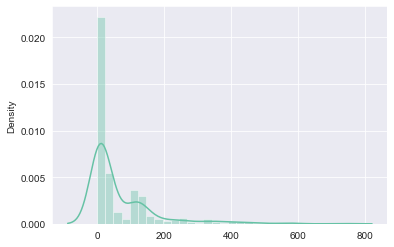

In [368]:
sns.distplot(SportsDB_numerical) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

**2) Distplot of the dataset (After normalization)**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

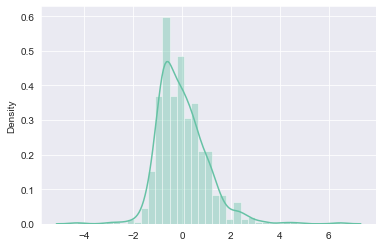

In [369]:
sns.distplot(SportsDB_normalized_numerical)

* After normalizing/scaling, the dataset is more accurate in the distribution. The dataset is normally distributed mean ± 3std

**3) Distplot for Skewness and Kurtosis**

In [370]:
SportsDB_numerical.dtypes

Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:title={'center':'HF'}, xlabel='HF', ylabel='Density'>

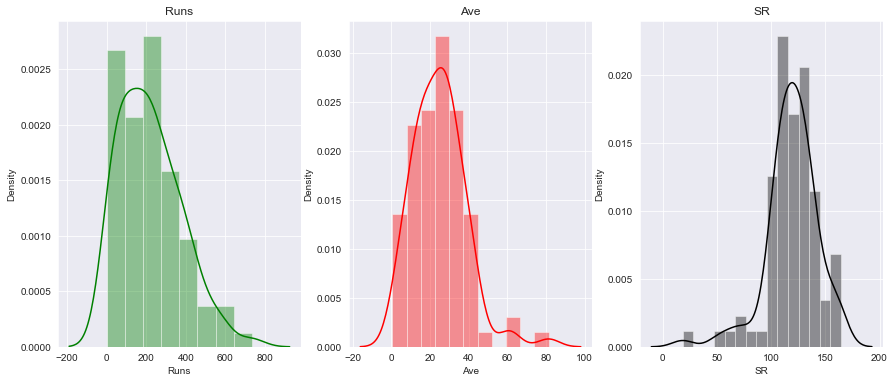

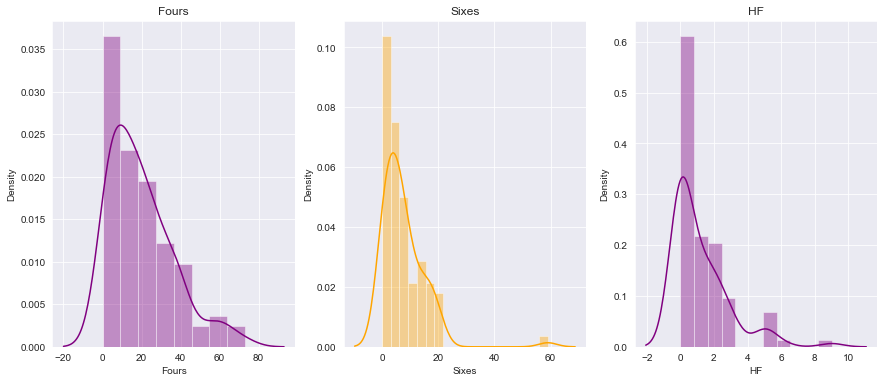

In [371]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Runs')
sns.distplot(SportsDB_numerical['Runs'],color='green')

plt.subplot(1, 4, 2)
plt.title('Ave')
sns.distplot(SportsDB_numerical['Ave'],color='red')

plt.subplot(1, 4, 3)
plt.title('SR')
sns.distplot(SportsDB_numerical['SR'],color='black')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Fours')
sns.distplot(SportsDB_numerical['Fours'],color='purple')

plt.subplot(1, 4, 2)
plt.title('Sixes')
sns.distplot(SportsDB_numerical['Sixes'],color='orange')

plt.subplot(1, 4, 3)
plt.title('HF')
sns.distplot(SportsDB_numerical['HF'],color='purple')




* From the above Plot, we can get a visual representation of the skewness and Kurtosis in the data.

* Skewness is the distortion of symmetry and when skewness value is between 0 to 1 are moderately skewed while greater than 1 or lesser than -1 are highly skewed. Postive and Negative skewness is as per the sign.


> Runs  =   0.754618 , high positive/right skewness

> Ave  =    1.038076 , high positive/right skewness

> SR    =  -1.166175 , high negative/left skewness

> Fours  =  1.107192 , high negative/left skewness

> Sixes =   3.226595 , highly positive/right skewness

> HF    =   2.001199 , highly positive/right skewness

* Kurtosis is a measure of tailedness that indicates the sharpness and flatness of peaks, Kurtosis 0 to 1 have flatter peaks while over 1 have sharper peaks and negative Kurtosis have the the least or more flatter peaks

> Runs   =   0.330792 , moderately sharp peak 

> Ave    =   2.712777 , highly sharp peak

> SR     =   3.745207 , highly sharp peak

> Fours  =   0.960768 , high sharp peak

> Sixes  =  18.078460 , extremely high sharp peak

> HF    =    5.003911 , highly sharp peak


### b) MEAN, MEDIAN AND MODE HISTOGRAM

**1) Runs vs Frequency**

Mean:  219.93333333333334 
Median:  196.5 
Mode:  35.0


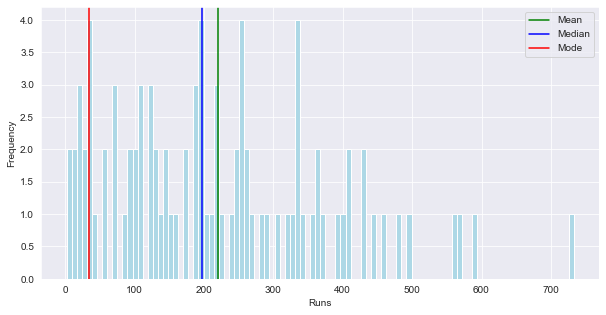

In [372]:
mean=SportsDB_numerical['Runs'].mean()
median=SportsDB_numerical['Runs'].median()
mode=SportsDB_numerical['Runs'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(SportsDB_numerical['Runs'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Runs')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (219.9) != Median (196.5) != Mode (35.0)

* Here, Mode <  Median < Mean - It is Right skewed or Positive Skewness. 

**2) Ave vs Frequency**

Mean:  24.729888888888883 
Median:  24.44 
Mode:  6.0


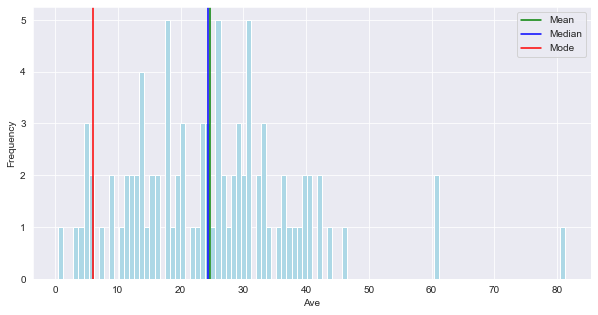

In [373]:
mean=SportsDB_numerical['Ave'].mean()
median=SportsDB_numerical['Ave'].median()
mode=SportsDB_numerical['Ave'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(SportsDB_numerical['Ave'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Ave')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (24.72) = Median (24.44) != Mode (6.0)

* Here, Mode <  Median = Mean - It is normally distributed with very low positive/right skewness.

**3) SR vs Frequency**

Mean:  119.16411111111107 
Median:  120.13499999999999 
Mode:  120.0


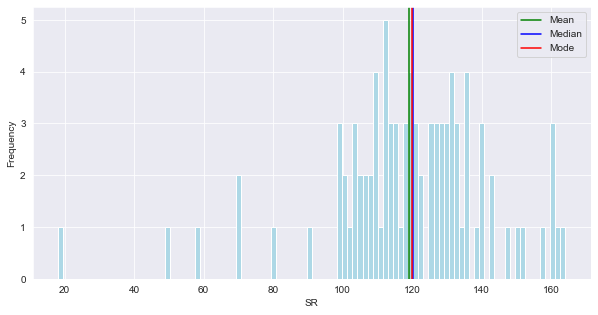

In [374]:
mean=SportsDB_numerical['SR'].mean()
median=SportsDB_numerical['SR'].median()
mode=SportsDB_numerical['SR'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(SportsDB_numerical['SR'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('SR')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (119.16) ~ Median (120.1) ~ Mode (120.0)

* Here, Mode =  Median = Mean - It is normally distributed with very less skewness

**4) Fours vs Frequency**

Mean:  19.788888888888888 
Median:  16.0 
Mode:  4.0


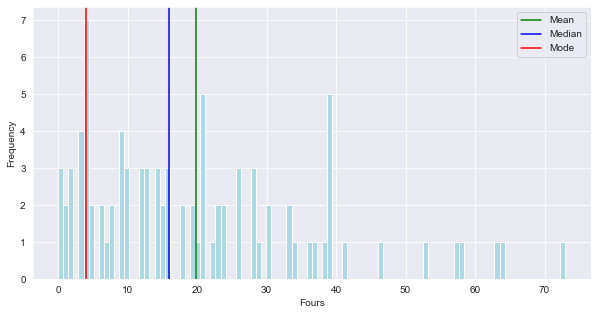

In [375]:
mean=SportsDB_numerical['Fours'].mean()
median=SportsDB_numerical['Fours'].median()
mode=SportsDB_numerical['Fours'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(SportsDB_numerical['Fours'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Fours')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (19.78) != Median (16.0) != Mode (4.0)

* Here, Mode < Median < Mean - It is Right skewed or Positive Skewness. 

**5) Sixes vs Frequency**

Mean:  7.5777777777777775 
Median:  6.0 
Mode:  0.0


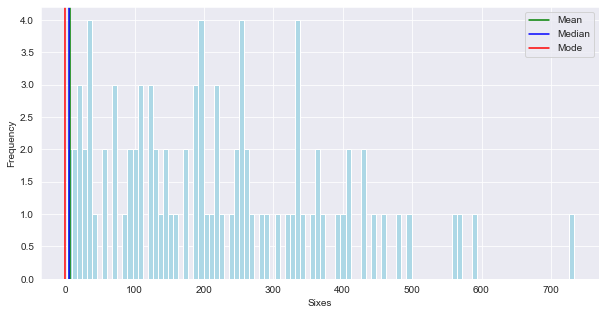

In [376]:
mean=SportsDB_numerical['Sixes'].mean()
median=SportsDB_numerical['Sixes'].median()
mode=SportsDB_numerical['Sixes'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(SportsDB_numerical['Runs'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Sixes')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (15.5) = Median (15.5) ~ Mode (14.5)

* Here, Mode ~ (Median = Mean) - It is Normally distributed

**6) HF vs Frequency**

Mean:  1.1888888888888889 
Median:  0.5 
Mode:  0.0


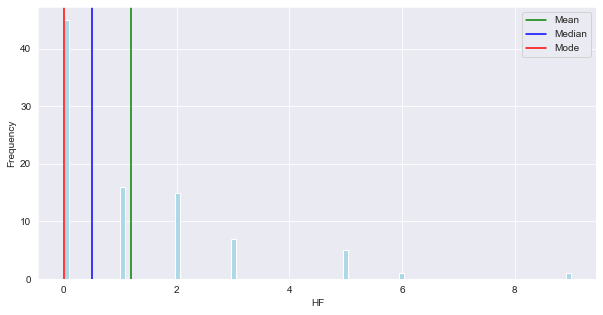

In [377]:
mean=SportsDB_numerical['HF'].mean()
median=SportsDB_numerical['HF'].median()
mode=SportsDB_numerical['HF'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(SportsDB_numerical['HF'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')  
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('HF')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (1.188) != Median (0.5) != Mode (0.0)

* Here, Mode < Median< Mean - It is Right skewed or Positive Skewness. 

### d) BOX PLOT

In [378]:
SportsDB_numerical.dtypes

Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site

<AxesSubplot:title={'center':'HF'}, xlabel='HF'>

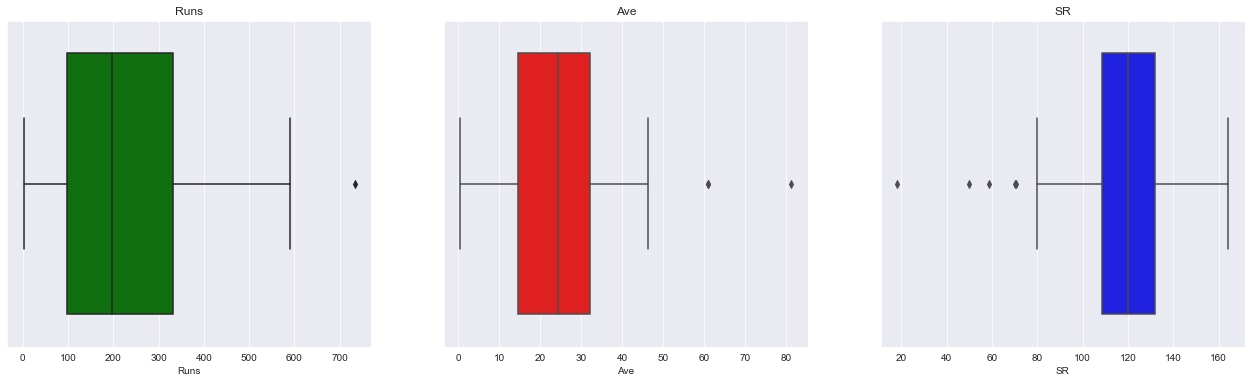

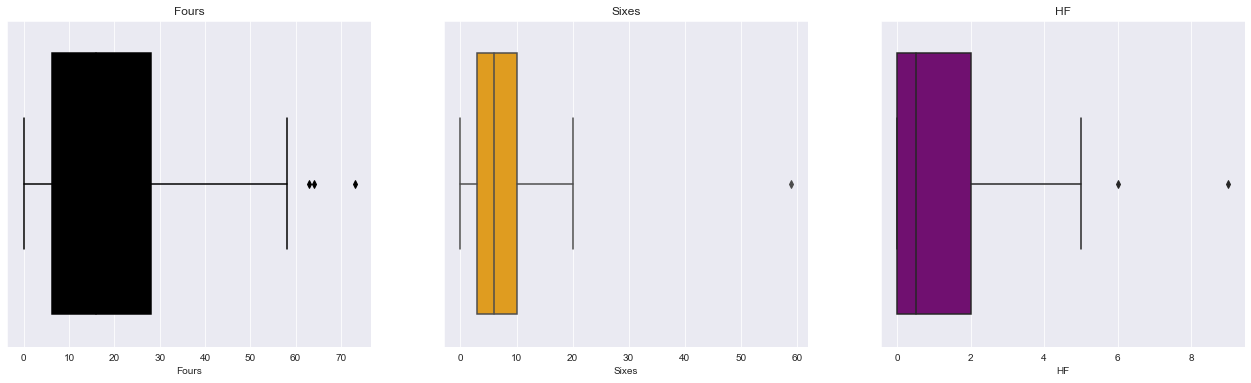

In [379]:
plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('Runs')
sns.boxplot(SportsDB_numerical['Runs'],orient='vertical',color='green')

plt.subplot(1, 4, 2)
plt.title('Ave')
sns.boxplot(SportsDB_numerical['Ave'],orient='vertical',color='red')

plt.subplot(1, 4, 3)
plt.title('SR')
sns.boxplot(SportsDB_numerical['SR'],orient='vertical',color='blue')

plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('Fours')
sns.boxplot(SportsDB_numerical['Fours'],orient='vertical',color='black')

plt.subplot(1, 4, 2)
plt.title('Sixes')
sns.boxplot(SportsDB_numerical['Sixes'],orient='vertical',color='orange')

plt.subplot(1, 4, 3)
plt.title('HF')
sns.boxplot(SportsDB_numerical['HF'],orient='vertical',color='purple')

In [380]:
# Finding the Interquartile Range for the Dataset
Q1 = SportsDB_numerical.quantile(0.25)
Q2 = SportsDB_numerical.quantile(0.50)
Q3 = SportsDB_numerical.quantile(0.75) 
IQR = Q3 - Q1
IQR

Runs     232.7500
Ave       17.5300
SR        23.2525
Fours     21.7500
Sixes      7.0000
HF         2.0000
dtype: float64

In [381]:
# Finding the Lowerfence values in the Dataset
Lowerfence_inner = Q1-(1.5 * IQR)
Lowerfence_inner

Runs    -251.12500
Ave      -11.63000
SR        73.86625
Fours    -26.37500
Sixes     -7.50000
HF        -3.00000
dtype: float64

In [382]:
# Finding the Upperfence values in the Dataset
Upperfence_inner = Q3+(1.5 * IQR)
Upperfence_inner

Runs     679.87500
Ave       58.49000
SR       166.87625
Fours     60.62500
Sixes     20.50000
HF         5.00000
dtype: float64

**Total number of Upper fence outliers**

In [383]:
# Count of Outliers over the upper fence
countoutup =(SportsDB_numerical>Upperfence_inner).sum()
countoutup

Runs     1
Ave      3
SR       0
Fours    3
Sixes    1
HF       2
dtype: int64

**Total number of Lower fence outliers**

In [384]:
# Count of Outliers below the lower fence
countoutdown =(SportsDB_numerical<Lowerfence_inner).sum()
countoutdown

Runs     0
Ave      0
SR       5
Fours    0
Sixes    0
HF       0
dtype: int64

**Total number of outliers**

In [385]:
#Count of Total Outliers
Totalout = countoutup + countoutdown
Totalout

Runs     1
Ave      3
SR       5
Fours    3
Sixes    1
HF       2
dtype: int64

### Removing outliers from the dataset

In [386]:
# We can further remove the outliers for better clarity on the data
DoutlierX8 = SportsDB_numerical.copy()
def remove_outliers(DoutlierX8, q=0.05):
    upper = DoutlierX8.quantile(1-q)
    lower = DoutlierX8.quantile(q)
    mask = (DoutlierX8 < upper) & (DoutlierX8 > lower)
    return mask
mask = remove_outliers(DoutlierX8, 0.1)
DoutlierX8 = DoutlierX8[mask]

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site

<AxesSubplot:title={'center':'HF'}, xlabel='HF'>

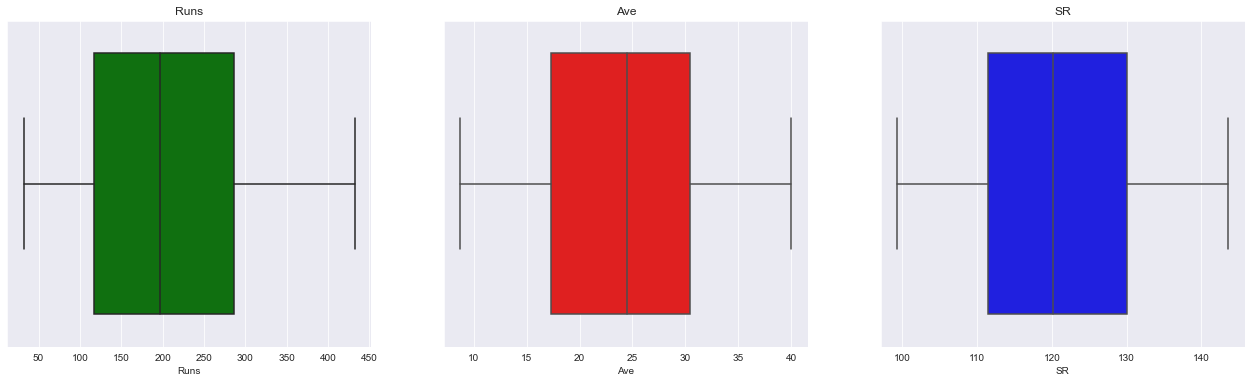

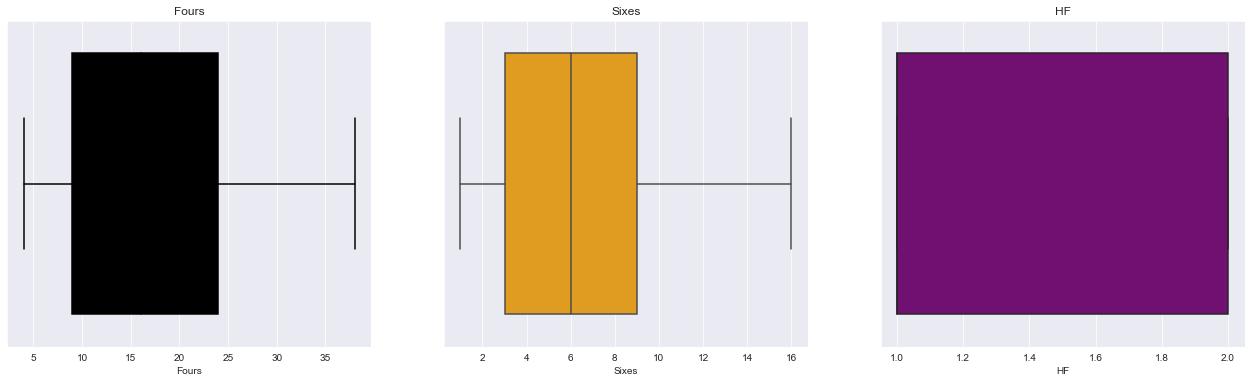

In [387]:
plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('Runs')
sns.boxplot(DoutlierX8['Runs'],orient='vertical',color='green')

plt.subplot(1, 4, 2)
plt.title('Ave')
sns.boxplot(DoutlierX8['Ave'],orient='vertical',color='red')

plt.subplot(1, 4, 3)
plt.title('SR')
sns.boxplot(DoutlierX8['SR'],orient='vertical',color='blue')

plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('Fours')
sns.boxplot(DoutlierX8['Fours'],orient='vertical',color='black')

plt.subplot(1, 4, 2)
plt.title('Sixes')
sns.boxplot(DoutlierX8['Sixes'],orient='vertical',color='orange')

plt.subplot(1, 4, 3)
plt.title('HF')
sns.boxplot(DoutlierX8['HF'],orient='vertical',color='purple')

### e) Barplot of categorical attributes in the dataset

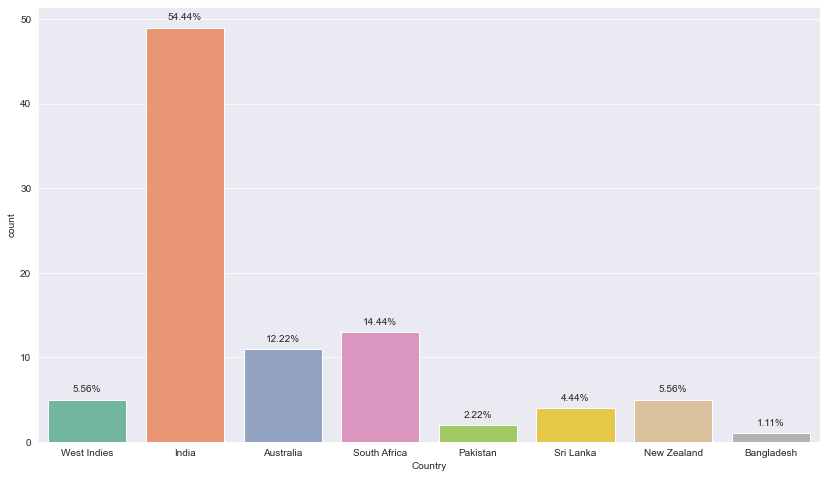

In [388]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(SportsDB1['Country'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = SportsDB1, x= 'Country') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(SportsDB1)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

The observations from the above plot is as follows:

> India > South Africa > Australia > (West Indies = New Zealand) > Sri Lanka > Pakistan > Bangladesh

### e) CUMULATIVE DISTRIBUTION

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

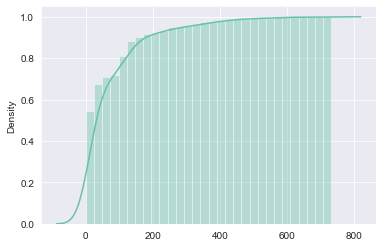

In [389]:
#Cumulative Distribution Plot
sns.distplot(SportsDB_numerical, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

* The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value. Use the CDF to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.7 Bivariate Analysis
   

### a) Bivariate barplot between Categorical and continuous attributes

In [390]:
SportsDB1.dtypes

Name       category
Runs        float64
Ave         float64
SR          float64
Fours       float64
Sixes       float64
HF          float64
Country      object
dtype: object

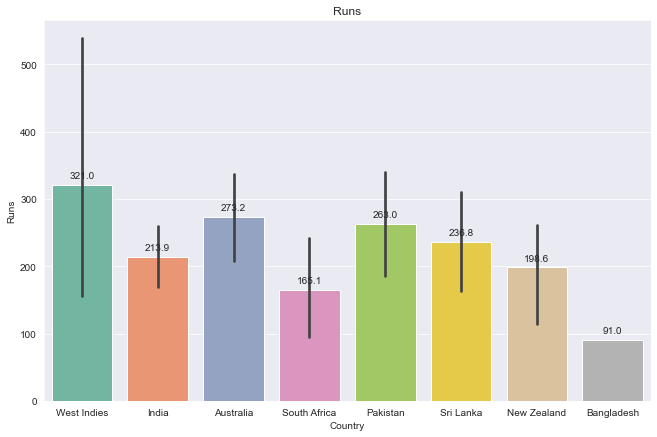

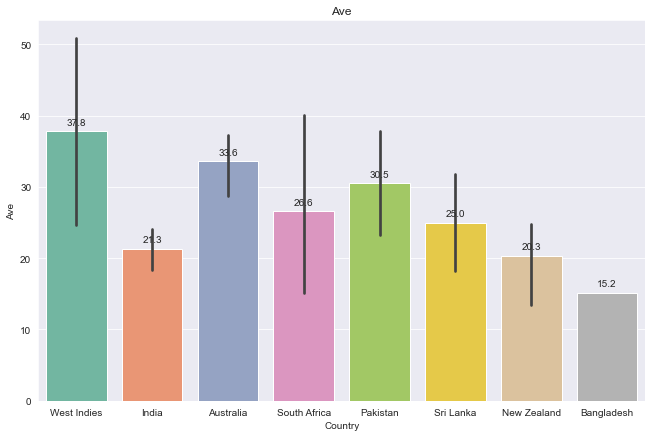

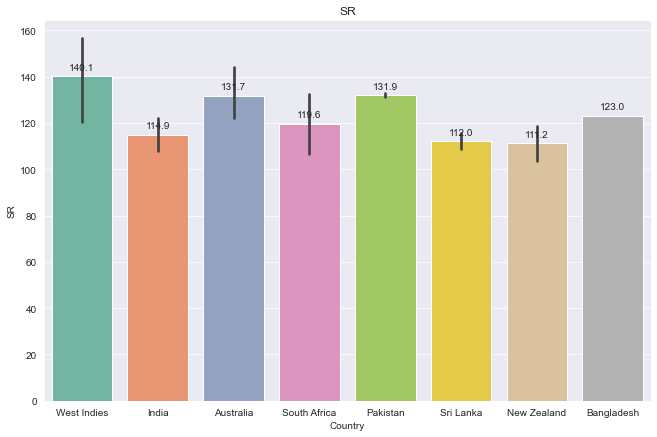

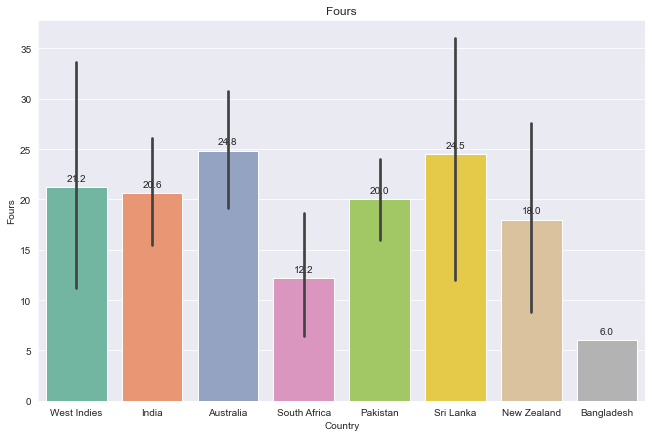

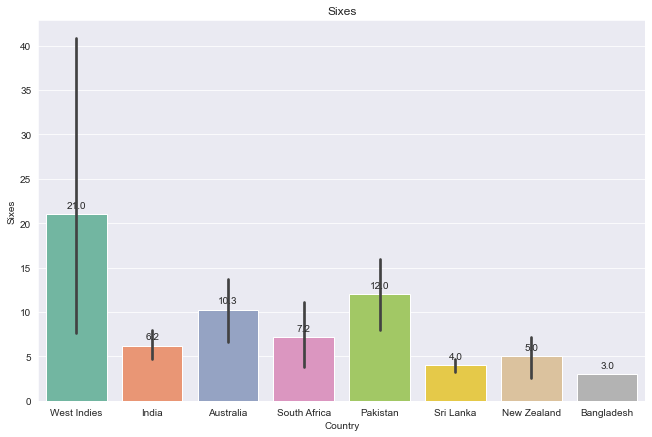

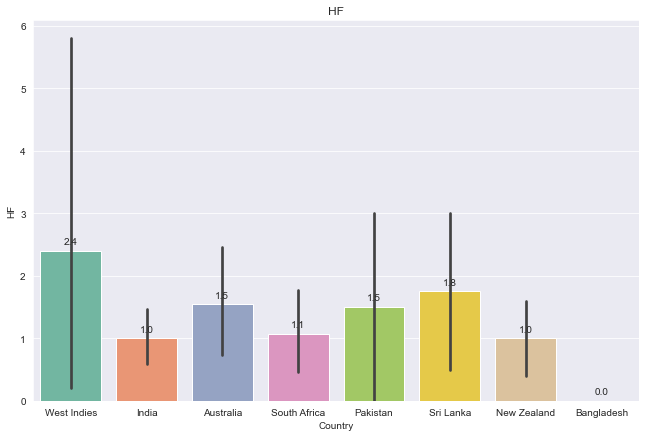

In [391]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('Runs')
splot = sns.barplot(x=SportsDB1['Country'], y=SportsDB1['Runs'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('Ave')
splot = sns.barplot(x=SportsDB1['Country'], y=SportsDB1['Ave'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('SR')
splot = sns.barplot(x=SportsDB1['Country'], y=SportsDB1['SR'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('Fours')
splot = sns.barplot(x=SportsDB1['Country'], y=SportsDB1['Fours'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('Sixes')
splot = sns.barplot(x=SportsDB1['Country'], y=SportsDB1['Sixes'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(50,7))
plt.subplot(1, 4, 1)
plt.title('HF')
splot = sns.barplot(x=SportsDB1['Country'], y=SportsDB1['HF'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

We know that: 

* Runs: Runs score by the batsman

* Ave: Average runs scored by the batsman per match

* SR: strike rate of the batsman

* Fours: number of boundary/four scored

* Six: number of boundary/six scored

* HF: number of half centuries scored so far

From the above plot, 'Country' categorical attribute vs all the continuous attributes, the following observations are: 

> Runs score by the batsman :  West Indies > Australia > Pakistan > Sri lanka > India > New Zealand > South Africa > Bangladesh

> Average runs scored by the batsman per match  :  West Indies > Australia > Pakistan > South Africa > Sri lanka > India > New Zealand > Bangladesh

> Strike rate of the batsman :  West Indies > Pakistan > Australia > Bangladesh > South Africa > India > Sri lanka >  New Zealand 

> Number of boundary/four scored: Australia > Sri lanka > West Indies > India > Pakistan >  New Zealand > South Africa > Bangladesh

> Number of boundary/six scored: West Indies > Pakistan >  Australia > South Africa > India > New Zealand > Sri lanka > Bangladesh

> number of half centuries scored so far: West Indies > Sri lanka > Pakistan =  Australia > South Africa > India = New Zealand > Bangladesh

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.8 Multivariate Analysis
   

### a) Multivariate 2 categorical and 1 numerical barplot

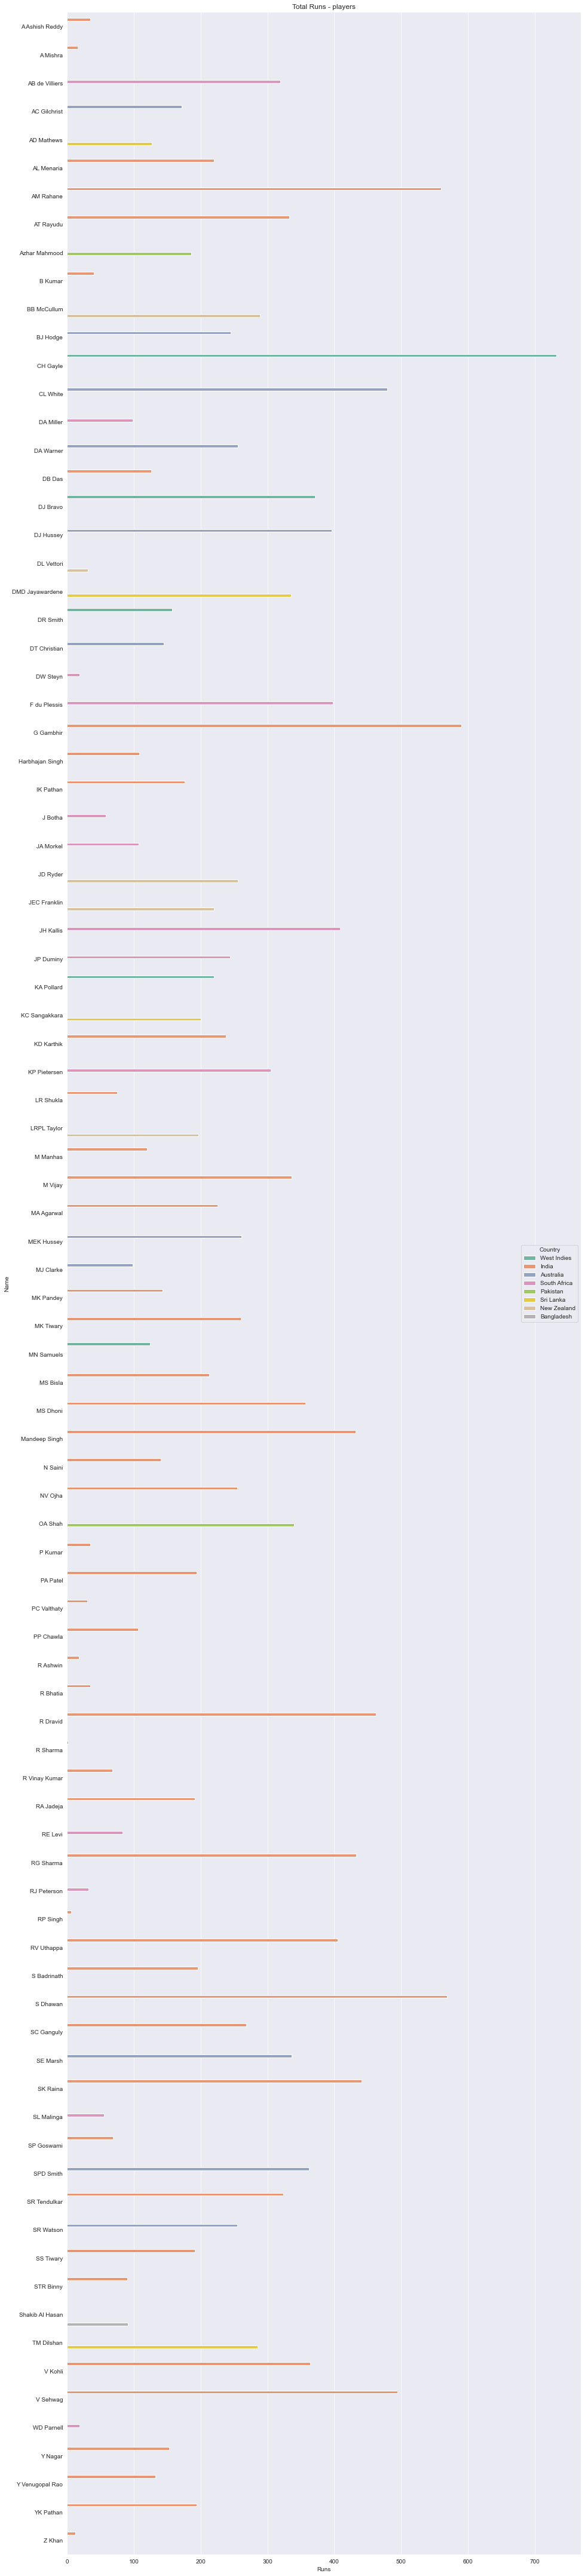

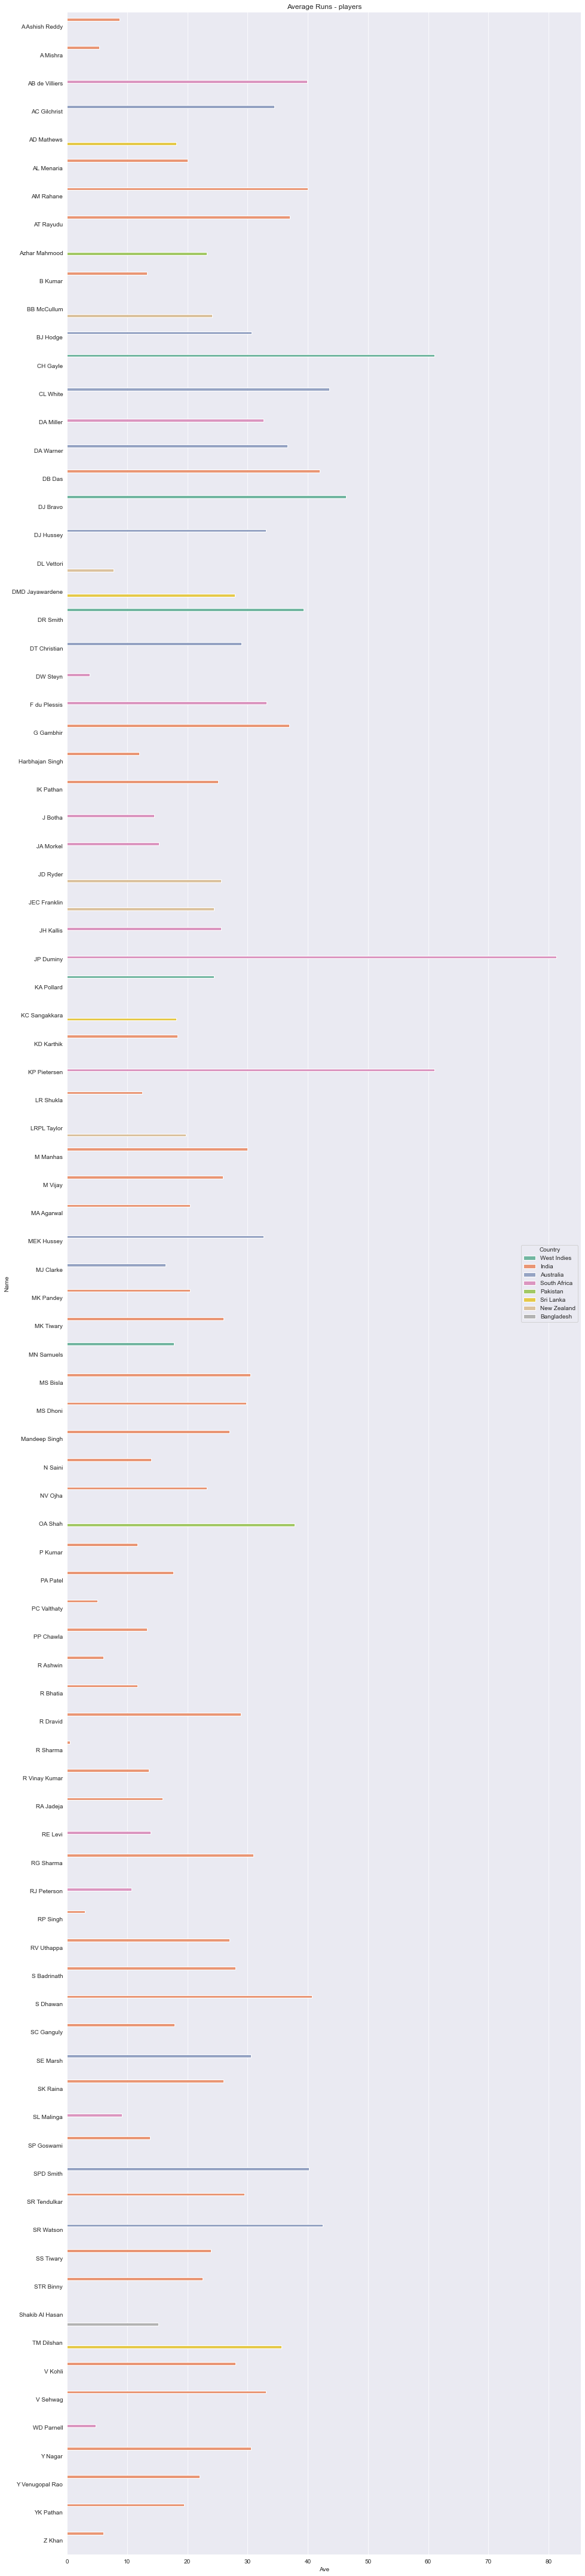

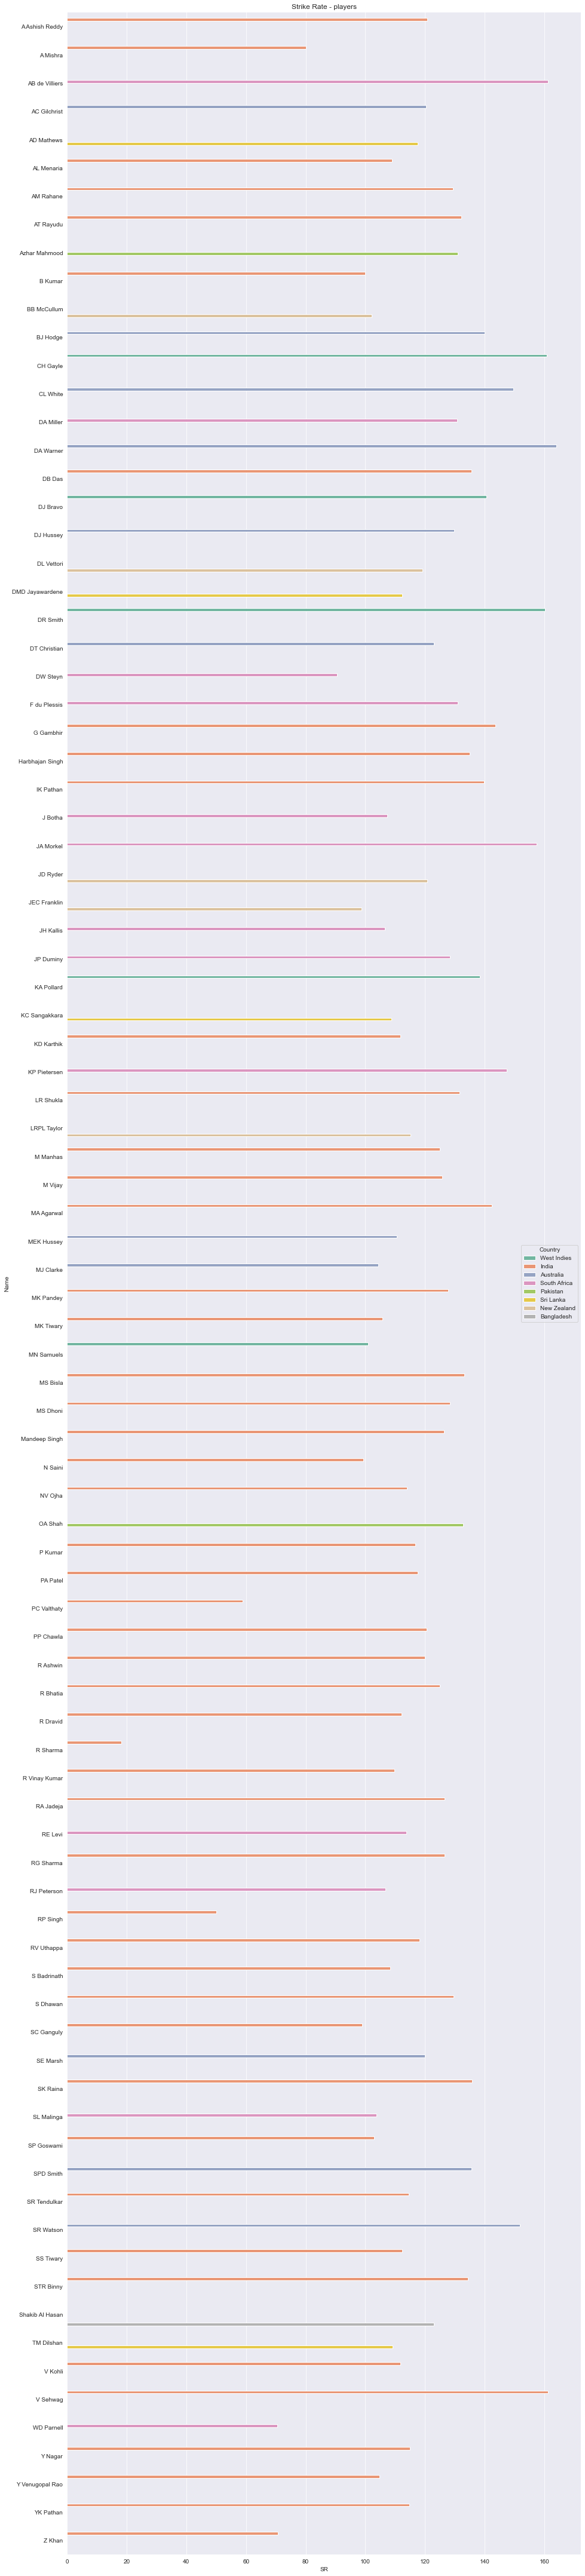

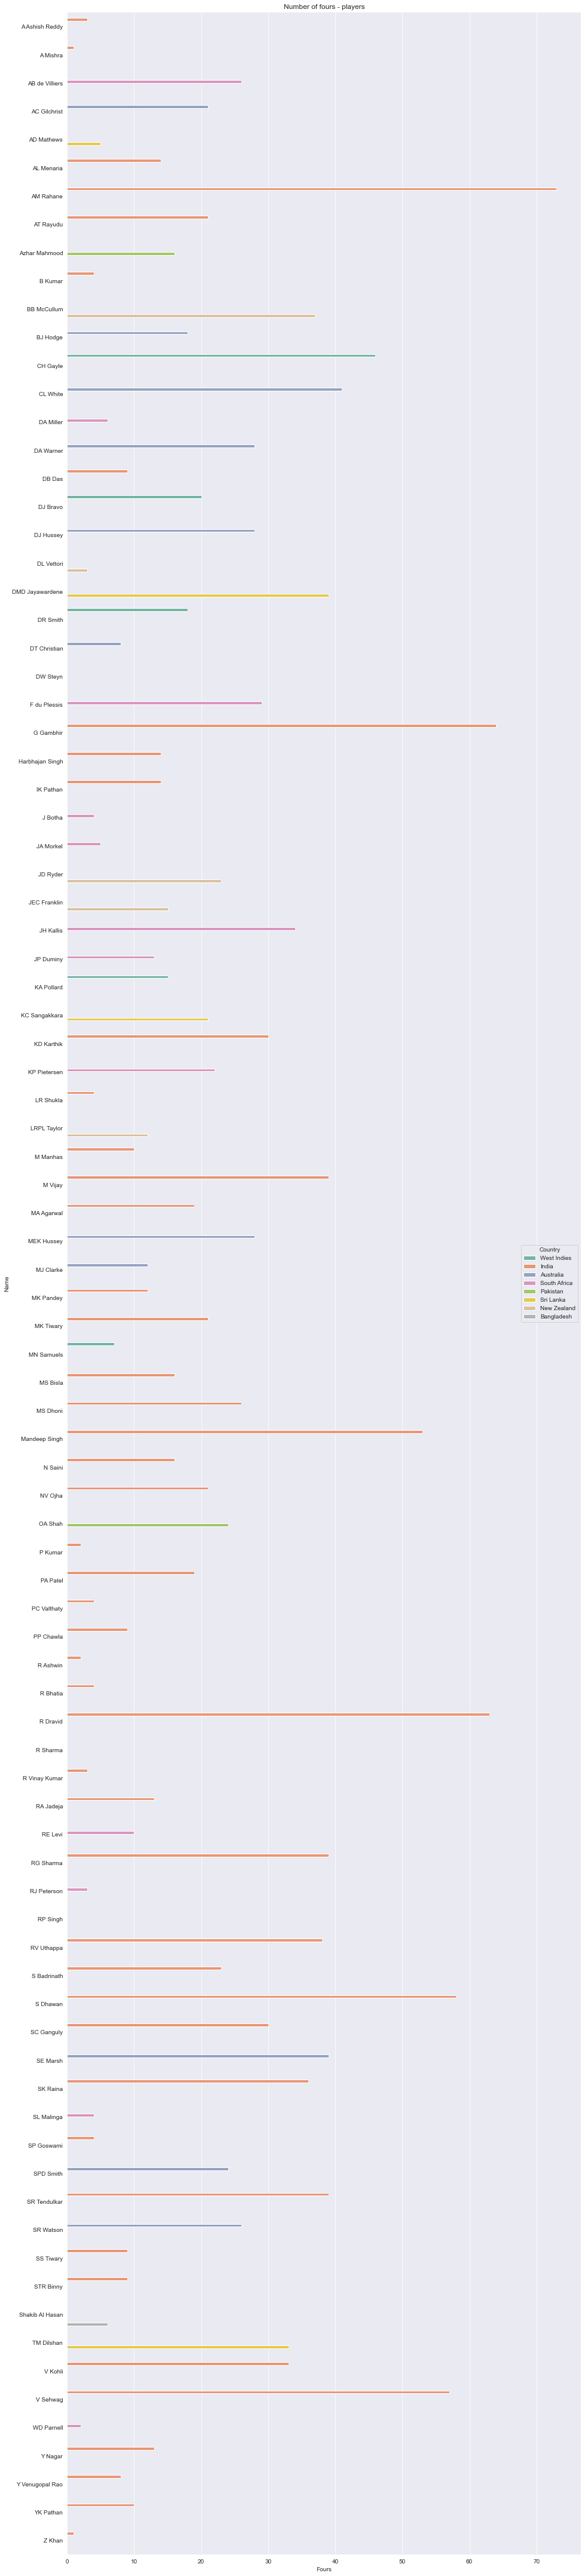

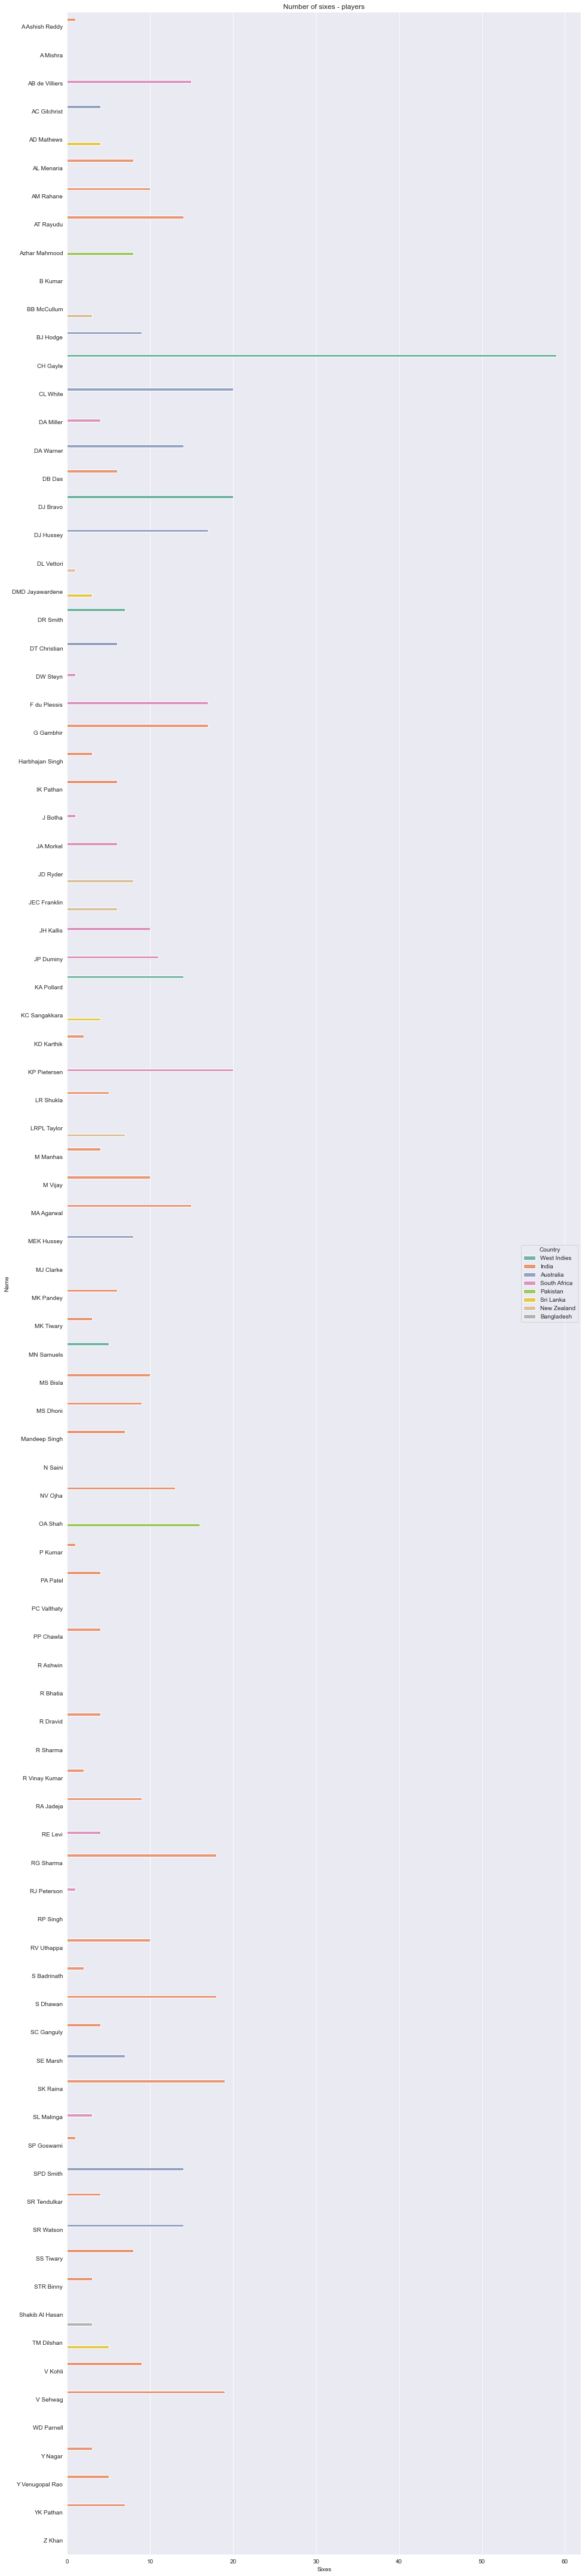

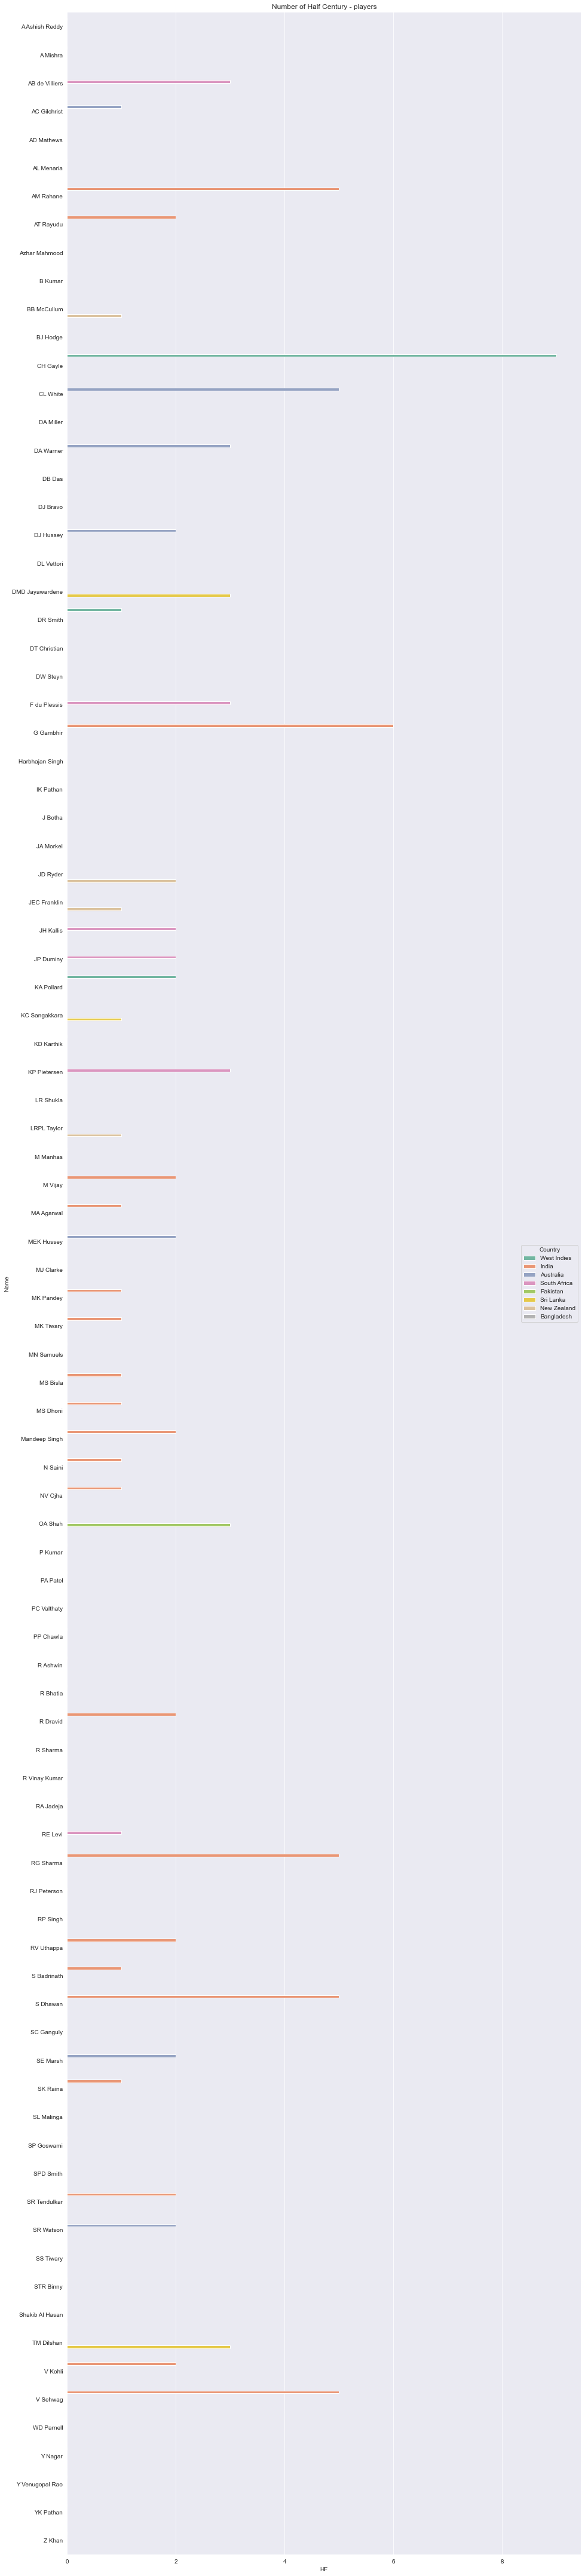

In [392]:
plt.figure(figsize=(50,60))
plt.subplot(1, 4, 1)
sns.barplot(y='Name',x='Runs',hue='Country',data=SportsDB1);
plt.title('Total Runs - players')
plt.xlabel('Runs')
plt.ylabel('Name')
plt.tight_layout()

plt.figure(figsize=(50,60))
plt.subplot(1, 4, 1)
sns.barplot(y='Name',x='Ave',hue='Country',data=SportsDB1);
plt.title('Average Runs - players')
plt.xlabel('Ave')
plt.ylabel('Name')
plt.tight_layout()

plt.figure(figsize=(50,60))
plt.subplot(1, 4, 1)
sns.barplot(y='Name',x='SR',hue='Country',data=SportsDB1);
plt.title('Strike Rate - players')
plt.xlabel('SR')
plt.ylabel('Name')
plt.tight_layout()

plt.figure(figsize=(50,60))
plt.subplot(1, 4, 1)
sns.barplot(y='Name',x='Fours',hue='Country',data=SportsDB1);
plt.title('Number of fours - players')
plt.xlabel('Fours')
plt.ylabel('Name')
plt.tight_layout()

plt.figure(figsize=(50,60))
plt.subplot(1, 4, 1)
sns.barplot(y='Name',x='Sixes',hue='Country',data=SportsDB1);
plt.title('Number of sixes - players')
plt.xlabel('Sixes')
plt.ylabel('Name')
plt.tight_layout()

plt.figure(figsize=(50,60))
plt.subplot(1, 4, 1)
sns.barplot(y='Name',x='HF',hue='Country',data=SportsDB1);
plt.title('Number of Half Century - players')
plt.xlabel('HF')
plt.ylabel('Name')
plt.tight_layout()


The above plots are between 1 continuous attribute vs 2 categorical attributes and hue 'Country', the following observations are only the top 3 in each attribute: 

> Runs score by the batsman : CH Gayle > G Gambhir > S Dhawan

> Average runs scored by the batsman per match : JP Duminey > KP Pieterson > CH Gayle 

> Strike rate of the batsman : DA Warner > AB de Villiers > V Sehwag

> Number of boundary/four scored : AM Rahane > G Gambhir > R Dravid

> Number of boundary/six scored: CH Gayle > DJ Bravo > KP Pieterson

> Number of half centuries scored so far: CH Gayle > G Gambhir > AM Rahane/CL White/RG Sharma/S Dhawan/V Sehwag

### b) Correlation Heatmap

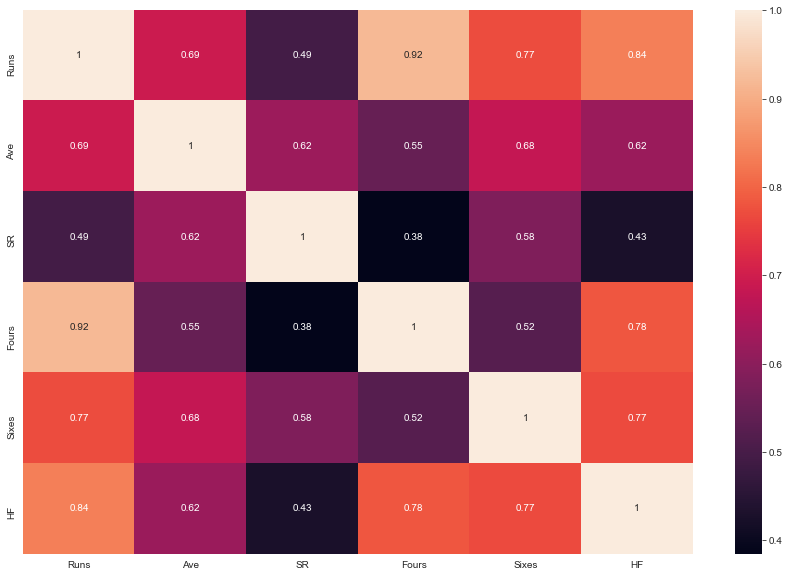

In [393]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(SportsDB_numerical.corr(),annot=True)
plt.show()

* The correlation heatmap is for numerical data from the SportsDB dataset, the Fours-Runs and Runs-HF have high correlation.

### c) Pairplot for checking the correlation

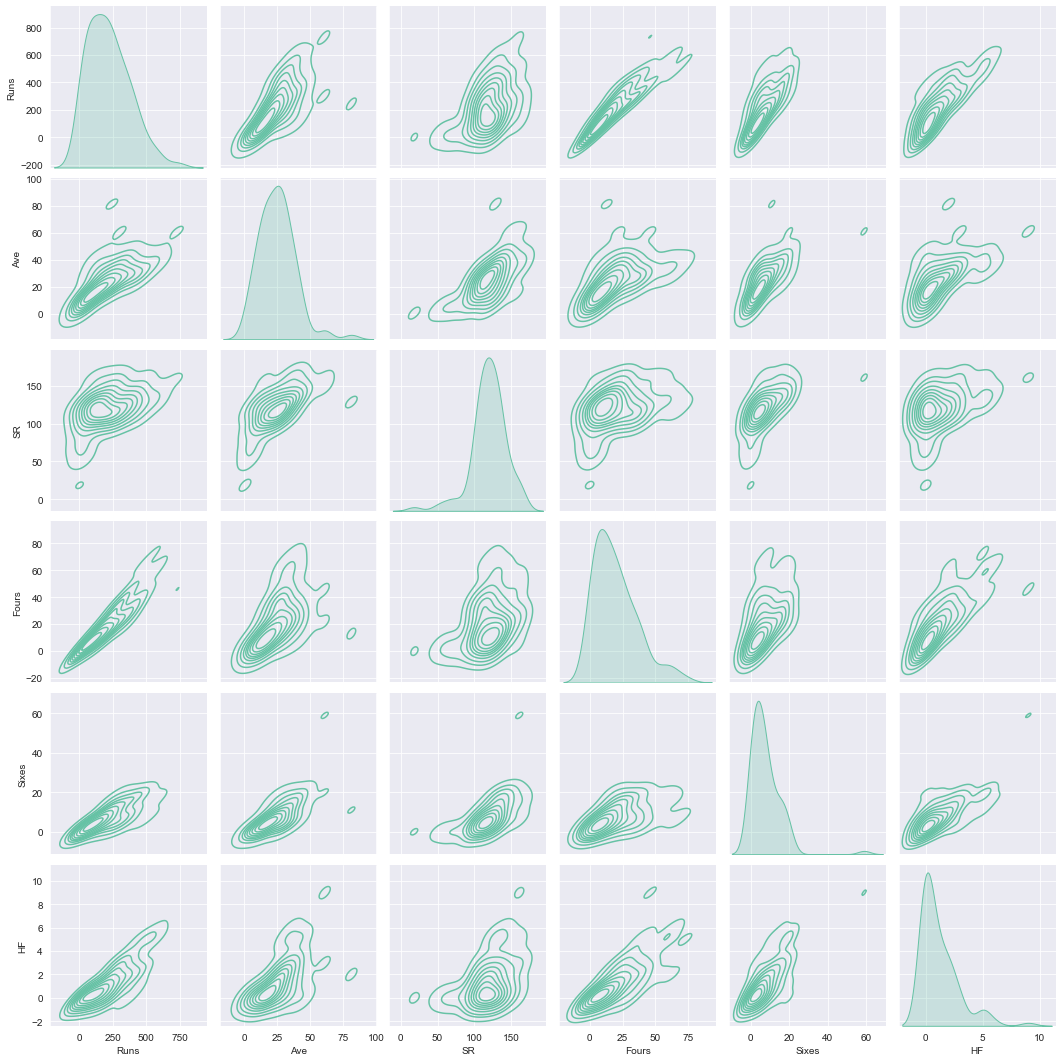

In [394]:
sns.pairplot(SportsDB_numerical, kind="kde")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

<font size="5"><p style="color:black"> <b> 2. Build a data driven model to rank all the players in the dataset using all or the most important performance features:</p></font>

In [395]:
SportsDB2_normalized = SportsDB1.copy()
SportsDB2_normalized['Runs'] = std_scale.fit_transform(SportsDB2_normalized[['Runs']]) 
SportsDB2_normalized['SR'] = std_scale.fit_transform(SportsDB2_normalized[['SR']]) 
SportsDB2_normalized['Fours'] = std_scale.fit_transform(SportsDB2_normalized[['Fours']]) 
SportsDB2_normalized['Sixes'] = std_scale.fit_transform(SportsDB2_normalized[['Sixes']]) 
SportsDB2_normalized['HF'] = std_scale.fit_transform(SportsDB2_normalized[['HF']])
SportsDB2_normalized['Ave'] = std_scale.fit_transform(SportsDB2_normalized[['HF']]) 
SportsDB2_normalized

,Name,Runs,Ave,SR,Fours,Sixes,HF,Country
0,CH Gayle,3.301945,4.651551,1.767325,1.607207,6.462679,4.651551,West Indies
1,G Gambhir,2.381639,2.865038,1.036605,2.710928,1.184173,2.865038,India
2,V Sehwag,1.770248,2.269533,1.788154,2.281703,1.435530,2.269533,India
3,CL White,1.667276,2.269533,1.297182,1.300618,1.561209,2.269533,Australia
4,S Dhawan,2.246490,2.269533,0.444038,2.343021,1.309851,2.269533,India
...,...,...,...,...,...,...,...,...
85,Z Khan,-1.338197,-0.707989,-2.065234,-1.152093,-0.952365,-0.707989,India
86,WD Parnell,-1.293147,-0.707989,-2.074160,-1.090775,-0.952365,-0.707989,South Africa
87,PC Valthaty,-1.222355,-0.707989,-2.565132,-0.968140,-0.952365,-0.707989,India
88,RP Singh,-1.376812,-0.707989,-2.940057,-1.213411,-0.952365,-0.707989,India


#### Dropping 'SR' as it is not applicable for the prediction of Average Runs

In [396]:
SportsDB2_normalized = SportsDB2_normalized.drop(['Country','SR'],axis = 1)

In [397]:
X = SportsDB2_normalized.drop(['Name'],axis = 1)

In [398]:
X

,Runs,Ave,Fours,Sixes,HF
0,3.301945,4.651551,1.607207,6.462679,4.651551
1,2.381639,2.865038,2.710928,1.184173,2.865038
2,1.770248,2.269533,2.281703,1.435530,2.269533
3,1.667276,2.269533,1.300618,1.561209,2.269533
4,2.246490,2.269533,2.343021,1.309851,2.269533
...,...,...,...,...,...
85,-1.338197,-0.707989,-1.152093,-0.952365,-0.707989
86,-1.293147,-0.707989,-1.090775,-0.952365,-0.707989
87,-1.222355,-0.707989,-0.968140,-0.952365,-0.707989
88,-1.376812,-0.707989,-1.213411,-0.952365,-0.707989


In [399]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X1 = X
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,Ave,inf
4,HF,inf
0,Runs,27.21
2,Fours,19.26
3,Sixes,8.38


In [400]:
X.shape

(90, 5)

### The Ranking is made based on the Average Runs per game

In [401]:
SportsDB2_normalized1 = SportsDB2_normalized.copy()
SportsDB2_normalized1['Rank'] = SportsDB2_normalized1['Ave'].rank(method = 'dense', ascending = 0)
SportsDB2_normalized1

,Name,Runs,Ave,Fours,Sixes,HF,Rank
0,CH Gayle,3.301945,4.651551,1.607207,6.462679,4.651551,1.0
1,G Gambhir,2.381639,2.865038,2.710928,1.184173,2.865038,2.0
2,V Sehwag,1.770248,2.269533,2.281703,1.435530,2.269533,3.0
3,CL White,1.667276,2.269533,1.300618,1.561209,2.269533,3.0
4,S Dhawan,2.246490,2.269533,2.343021,1.309851,2.269533,3.0
...,...,...,...,...,...,...,...
85,Z Khan,-1.338197,-0.707989,-1.152093,-0.952365,-0.707989,7.0
86,WD Parnell,-1.293147,-0.707989,-1.090775,-0.952365,-0.707989,7.0
87,PC Valthaty,-1.222355,-0.707989,-0.968140,-0.952365,-0.707989,7.0
88,RP Singh,-1.376812,-0.707989,-1.213411,-0.952365,-0.707989,7.0


In [402]:
SportsDB2_normalized1['Rank'] = SportsDB2_normalized1['Rank'].astype(int)

In [403]:
SportsDB2_normalized1 = SportsDB2_normalized1.sort_values(by ='Rank', ascending = True)
SportsDB2_normalized1

,Name,Runs,Ave,Fours,Sixes,HF,Rank
0,CH Gayle,3.301945,4.651551,1.607207,6.462679,4.651551,1
1,G Gambhir,2.381639,2.865038,2.710928,1.184173,2.865038,2
2,V Sehwag,1.770248,2.269533,2.281703,1.435530,2.269533,3
3,CL White,1.667276,2.269533,1.300618,1.561209,2.269533,3
4,S Dhawan,2.246490,2.269533,2.343021,1.309851,2.269533,3
...,...,...,...,...,...,...,...
61,YK Pathan,-0.166899,-0.707989,-0.600233,-0.072614,-0.707989,7
62,Harbhajan Singh,-0.720370,-0.707989,-0.354962,-0.575329,-0.707989,7
38,DB Das,-0.604527,-0.707989,-0.661551,-0.198293,-0.707989,7
54,Y Nagar,-0.430763,-0.707989,-0.416280,-0.575329,-0.707989,7


In [404]:
SportsDB2_normalized1[SportsDB2_normalized1['Rank']==7]

,Name,Runs,Ave,Fours,Sixes,HF,Rank
14,DJ Bravo,0.972220,-0.707989,0.012945,1.561209,-0.707989,7
70,MN Samuels,-0.617398,-0.707989,-0.784186,-0.323972,-0.707989,7
71,MJ Clarke,-0.784727,-0.707989,-0.477597,-0.952365,-0.707989,7
72,R Bhatia,-1.190176,-0.707989,-0.968140,-0.952365,-0.707989,7
73,R Vinay Kumar,-0.977798,-0.707989,-1.029458,-0.701008,-0.707989,7
74,P Kumar,-1.190176,-0.707989,-1.090775,-0.826687,-0.707989,7
75,J Botha,-1.042155,-0.707989,-0.968140,-0.826687,-0.707989,7
76,A Ashish Reddy,-1.190176,-0.707989,-1.029458,-0.826687,-0.707989,7
77,DL Vettori,-1.215919,-0.707989,-1.029458,-0.826687,-0.707989,7
78,SP Goswami,-0.971362,-0.707989,-0.968140,-0.826687,-0.707989,7


In [405]:
y = SportsDB2_normalized1[['Rank']]
SportsDB2_normalized1['Predicted_Rank'] = np.nan
empty1 = SportsDB2_normalized1[['Predicted_Rank']]

In [406]:
empty1

,Predicted_Rank
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
61,NaN
62,NaN
38,NaN
54,NaN


In [407]:
y

,Rank
0,1
1,2
2,3
3,3
4,3
...,...
61,7
62,7
38,7
54,7


In [408]:
SportsDB2_normalized1

,Name,Runs,Ave,Fours,Sixes,HF,Rank,Predicted_Rank
0,CH Gayle,3.301945,4.651551,1.607207,6.462679,4.651551,1,NaN
1,G Gambhir,2.381639,2.865038,2.710928,1.184173,2.865038,2,NaN
2,V Sehwag,1.770248,2.269533,2.281703,1.435530,2.269533,3,NaN
3,CL White,1.667276,2.269533,1.300618,1.561209,2.269533,3,NaN
4,S Dhawan,2.246490,2.269533,2.343021,1.309851,2.269533,3,NaN
...,...,...,...,...,...,...,...,...
61,YK Pathan,-0.166899,-0.707989,-0.600233,-0.072614,-0.707989,7,NaN
62,Harbhajan Singh,-0.720370,-0.707989,-0.354962,-0.575329,-0.707989,7,NaN
38,DB Das,-0.604527,-0.707989,-0.661551,-0.198293,-0.707989,7,NaN
54,Y Nagar,-0.430763,-0.707989,-0.416280,-0.575329,-0.707989,7,NaN


In [409]:
y1 = SportsDB2_normalized1.drop(['Name','Rank','Predicted_Rank'],axis = 1)

In [410]:
y1

,Runs,Ave,Fours,Sixes,HF
0,3.301945,4.651551,1.607207,6.462679,4.651551
1,2.381639,2.865038,2.710928,1.184173,2.865038
2,1.770248,2.269533,2.281703,1.435530,2.269533
3,1.667276,2.269533,1.300618,1.561209,2.269533
4,2.246490,2.269533,2.343021,1.309851,2.269533
...,...,...,...,...,...
61,-0.166899,-0.707989,-0.600233,-0.072614,-0.707989
62,-0.720370,-0.707989,-0.354962,-0.575329,-0.707989
38,-0.604527,-0.707989,-0.661551,-0.198293,-0.707989
54,-0.430763,-0.707989,-0.416280,-0.575329,-0.707989


In [411]:
from sklearn.linear_model import LogisticRegression
LogReg2 = LogisticRegression()
LogReg2.fit(X, y)
predict_sport = LogReg2.predict(y1)

empty1['Predicted_Rank'] = empty1.Predicted_Rank
dsscore = SportsDB2_normalized1.copy()
dsscore.loc[(dsscore.Predicted_Rank.isnull()), 'Predicted_Rank'] = predict_sport
dsscore

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-411-94a4c0b04ce7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty1['Predicted_Rank'] = empty1.Predicted_Rank


,Name,Runs,Ave,Fours,Sixes,HF,Rank,Predicted_Rank
0,CH Gayle,3.301945,4.651551,1.607207,6.462679,4.651551,1,1
1,G Gambhir,2.381639,2.865038,2.710928,1.184173,2.865038,2,3
2,V Sehwag,1.770248,2.269533,2.281703,1.435530,2.269533,3,3
3,CL White,1.667276,2.269533,1.300618,1.561209,2.269533,3,3
4,S Dhawan,2.246490,2.269533,2.343021,1.309851,2.269533,3,3
...,...,...,...,...,...,...,...,...
61,YK Pathan,-0.166899,-0.707989,-0.600233,-0.072614,-0.707989,7,7
62,Harbhajan Singh,-0.720370,-0.707989,-0.354962,-0.575329,-0.707989,7,7
38,DB Das,-0.604527,-0.707989,-0.661551,-0.198293,-0.707989,7,7
54,Y Nagar,-0.430763,-0.707989,-0.416280,-0.575329,-0.707989,7,7


### The Rank from 'Ave' alone

In [412]:
dsscore[['Rank','Name']]

,Rank,Name
0,1,CH Gayle
1,2,G Gambhir
2,3,V Sehwag
3,3,CL White
4,3,S Dhawan
...,...,...
61,7,YK Pathan
62,7,Harbhajan Singh
38,7,DB Das
54,7,Y Nagar


### The Predicted_Rank from attributes 'Runs', 'Ave', 'Fours', 'Sixes', 'HF'

In [413]:
dsscore[['Predicted_Rank','Name']]

,Predicted_Rank,Name
0,1,CH Gayle
1,3,G Gambhir
2,3,V Sehwag
3,3,CL White
4,3,S Dhawan
...,...,...
61,7,YK Pathan
62,7,Harbhajan Singh
38,7,DB Das
54,7,Y Nagar


In [414]:
dsscore[dsscore['Predicted_Rank']==4]

,Name,Runs,Ave,Fours,Sixes,HF,Rank,Predicted_Rank
7,RG Sharma,1.371234,2.269533,1.177983,1.309851,2.269533,3,4
13,OA Shah,0.772713,1.078525,0.258216,1.058494,1.078525,4,4
12,F du Plessis,1.145984,1.078525,0.564805,1.184173,1.078525,4,4
10,DA Warner,0.232114,1.078525,0.503487,0.807137,1.078525,4,4
8,AB de Villiers,0.637564,1.078525,0.380852,0.932815,1.078525,4,4
6,KP Pietersen,0.547464,1.078525,0.135580,1.561209,1.078525,4,4
26,KA Pollard,0.000429,0.483020,-0.293644,0.807137,0.483020,5,4
9,JP Duminy,0.154886,0.483020,-0.416280,0.430100,0.483020,5,4


### •Here, the 'Predicted_Rank' attribute is not orderly arranged thats because it was predicted with the 'Rank' attribute. This made the model assume values that '2' will only occur when it surpasses a specific value. 

### •Thats why we have '3' instead of '2'. However, these are ordered in the descending value of ranks. We can assume 'Predicted Rank 3' as 'Rank 2', the TOP 3 Ranks are as follows:

### > Rank 1 - CH Gayle, 

### > Rank 2 - V Sehwag, CL White, S Dhawan, AM Rahane, 

### > Rank 3 - RG Sharma, OA Shah, F du Plessis, DA Warner, AB de Villiers, KP Pietersen, KA Pollard, JP Duminy	

